In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

%config InlineBackend.figure_format = 'retina'

In [2]:
from fredapi import Fred
fred_api_key = '911a7f897b7d89ecbda8931c026bf0c0'
fred = Fred(api_key=fred_api_key)

### Series
1. Capacity utilization (TCU)
2. Nominal potential GDP (NGDPPOT)
3. NY Fed Global Supply Chain Pressure Index ()

In [3]:
def to_quarterly(series, method='mean'):
    """
    Convert a time series to quarterly frequency

    Parameters:
    -----------
    series : pd.Series
        Series with datetime index
    method : str
        'last' - take last observation of quarter
        'mean' - take average of quarter
        'first' - take first observation of quarter

    Returns:
    --------
    pd.Series with quarterly frequency (end-of-quarter dates)
    """
    if method == 'last':
        return series.resample('QE').last()
    elif method == 'mean':
        return series.resample('QE').mean()
    elif method == 'first':
        return series.resample('QE').first()
    else:
        raise ValueError(f"Unknown method: {method}")

In [4]:
tcu = fred.get_series('TCU')
gdp = fred.get_series('NGDPPOT')

# convert gdp to quarterly
gdp_quarterly = to_quarterly(gdp, method='last')

# convert tcu to quarterly
tcu_quarterly = to_quarterly(tcu, method='mean')

# turn these into a dataframe
df = pd.DataFrame({'TCU': tcu_quarterly, 'NGDPPOT': gdp_quarterly})

In [5]:
# detrend tcu by subtracting from ten year mean
df['TCU_sub_10Y'] = df['TCU'] - df['TCU'].rolling('3650D').mean()

<Axes: xlabel='None', ylabel='TCU_sub_10Y'>

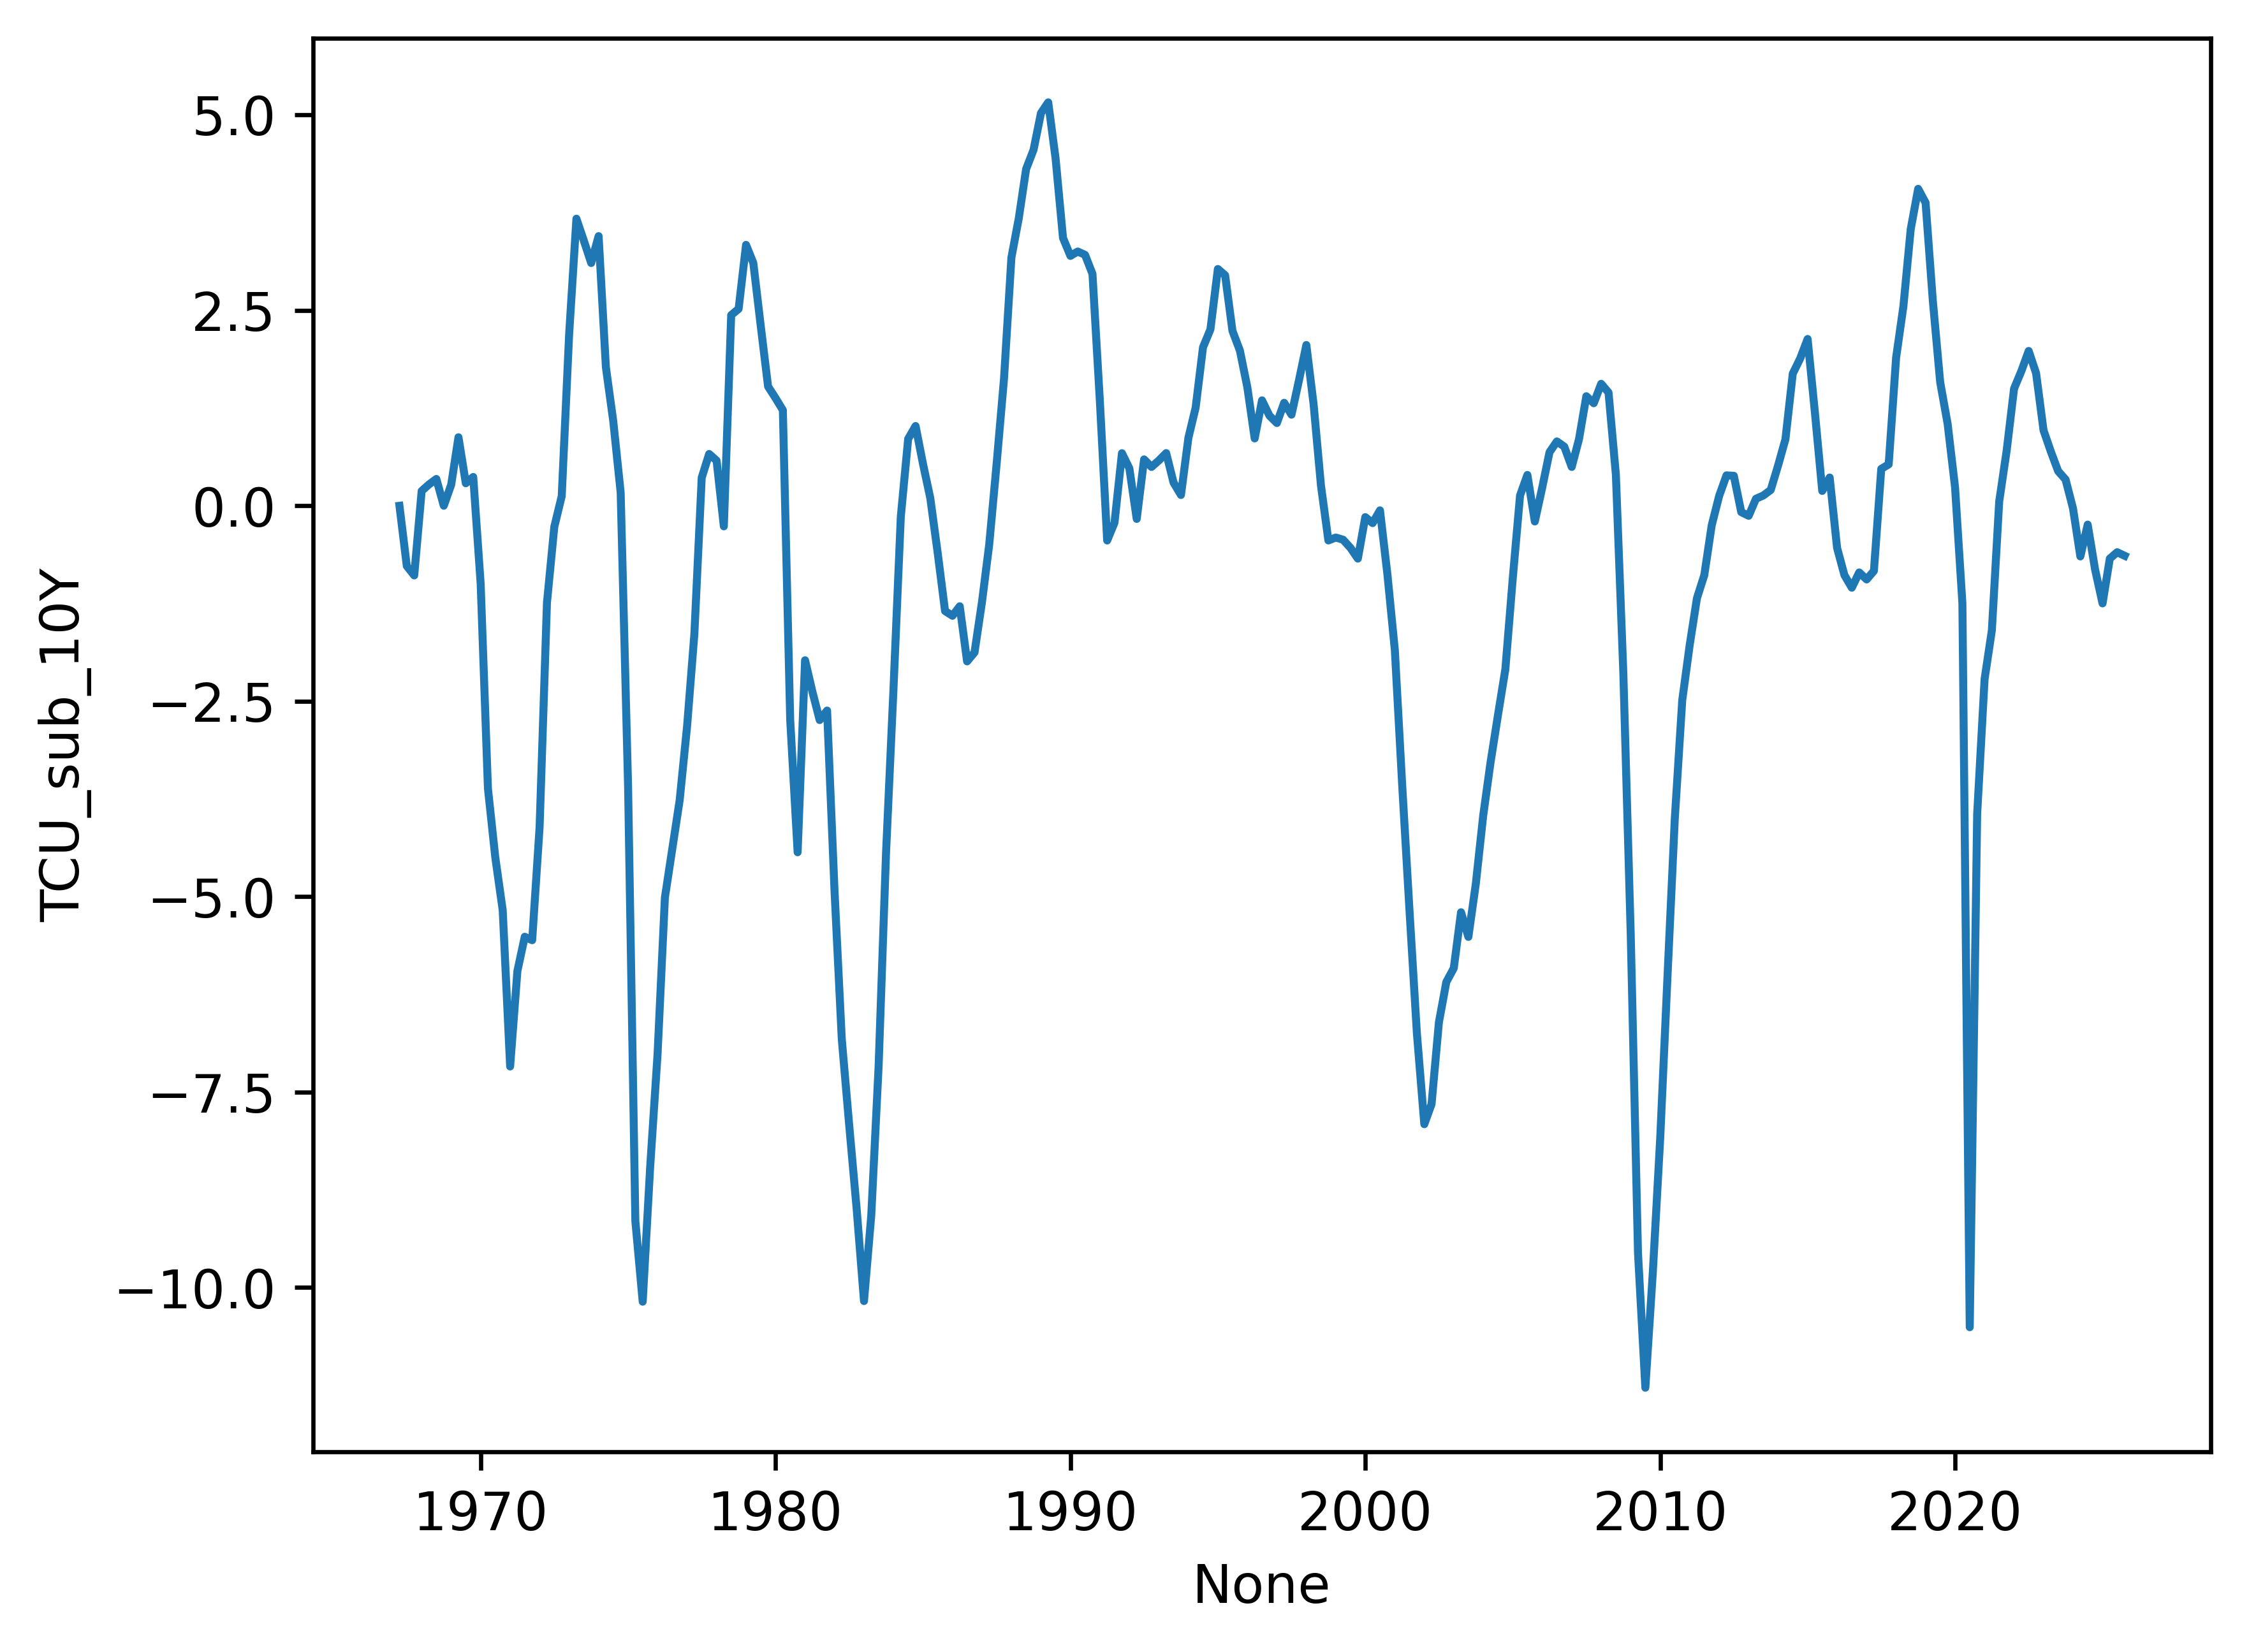

In [6]:
sns.lineplot(x=df.index, y=df['TCU_sub_10Y'])

<Axes: xlabel='None', ylabel='TCU'>

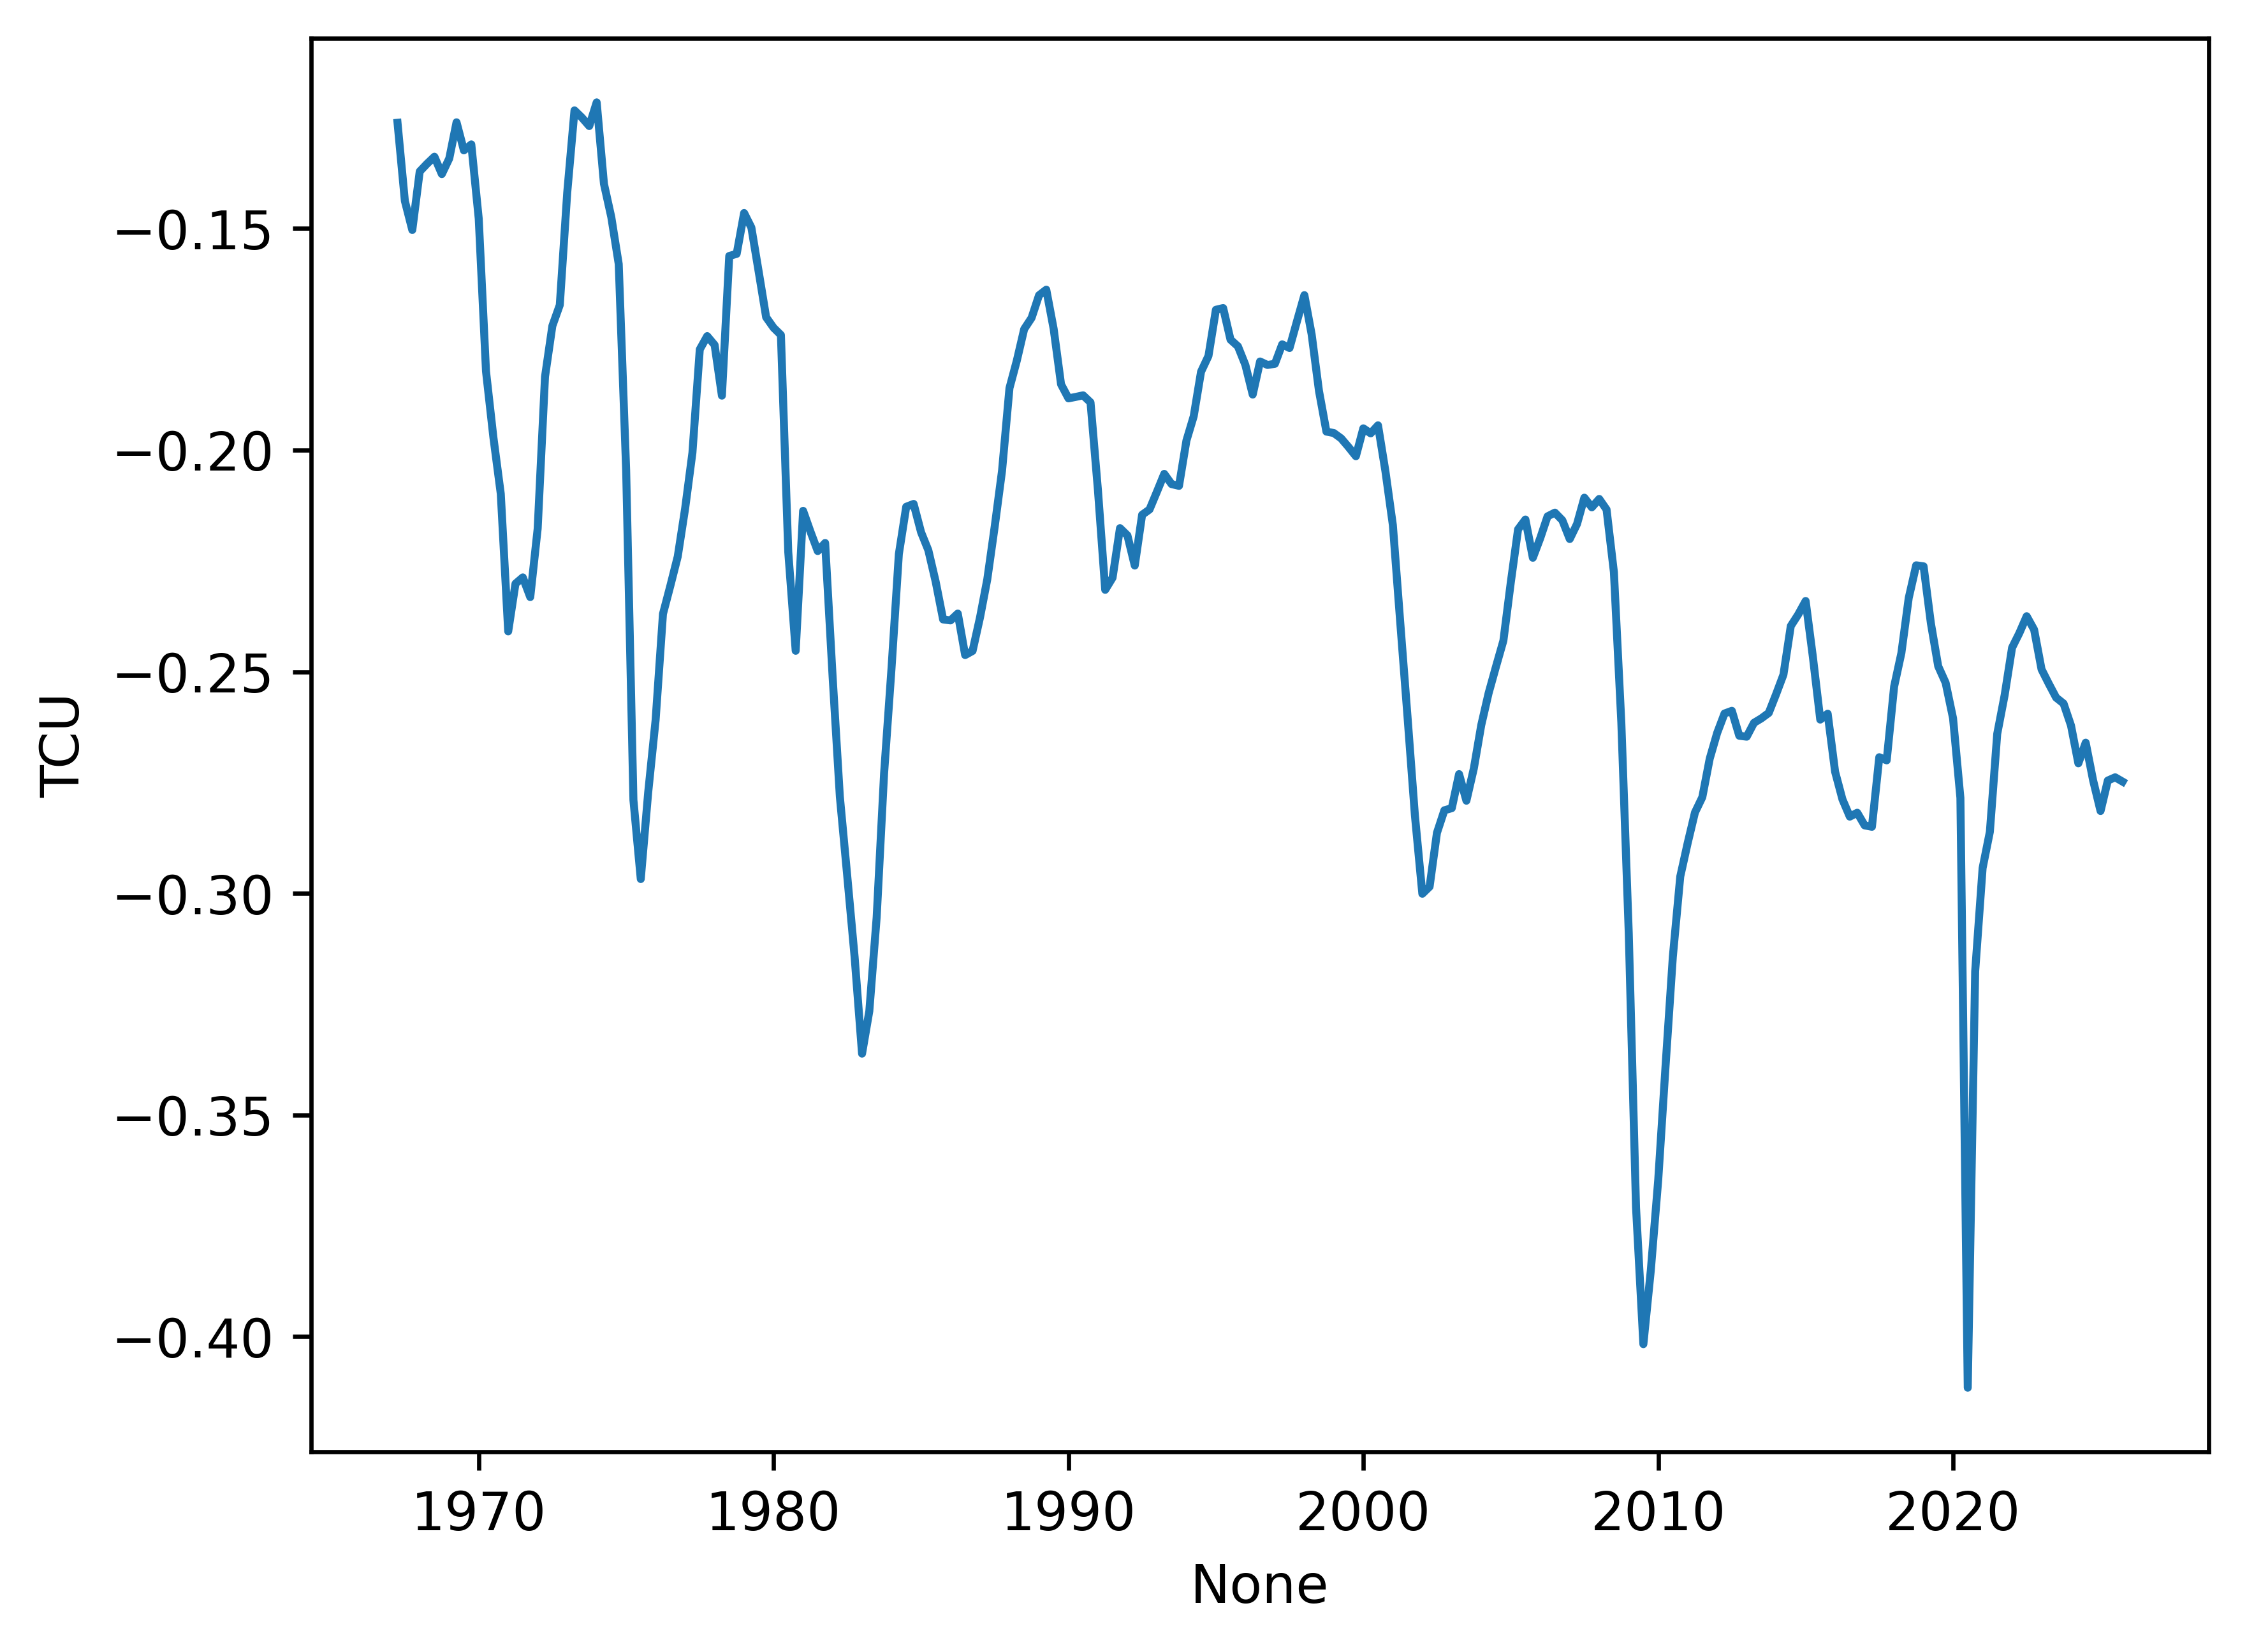

In [7]:
sns.lineplot(x=df.index, y=np.log(df['TCU']/100))

In [8]:
df.to_clipboard()

## Just look at regression data

In [9]:
df_reg = pd.read_excel('Public Data/Regression_Data.xlsx')

def convert_date(df):
    if 'Date' in df.columns:
        if not pd.api.types.is_datetime64_any_dtype(df['Date']):
            df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.replace(" ", "") if isinstance(x, str) else x))
    df['period'] = df['Date']
    df = df.drop('Date', axis=1)
    df = df.sort_values('period').reset_index(drop=True)
    return df

df_reg = convert_date(df_reg)

/var/folders/g_/cwvjv87n3wq590ldrjtpds000000gn/T/ipykernel_47790/3236598486.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.replace(" ", "") if isinstance(x, str) else x))


<Axes: xlabel='None', ylabel='TCU_sub_10Y'>

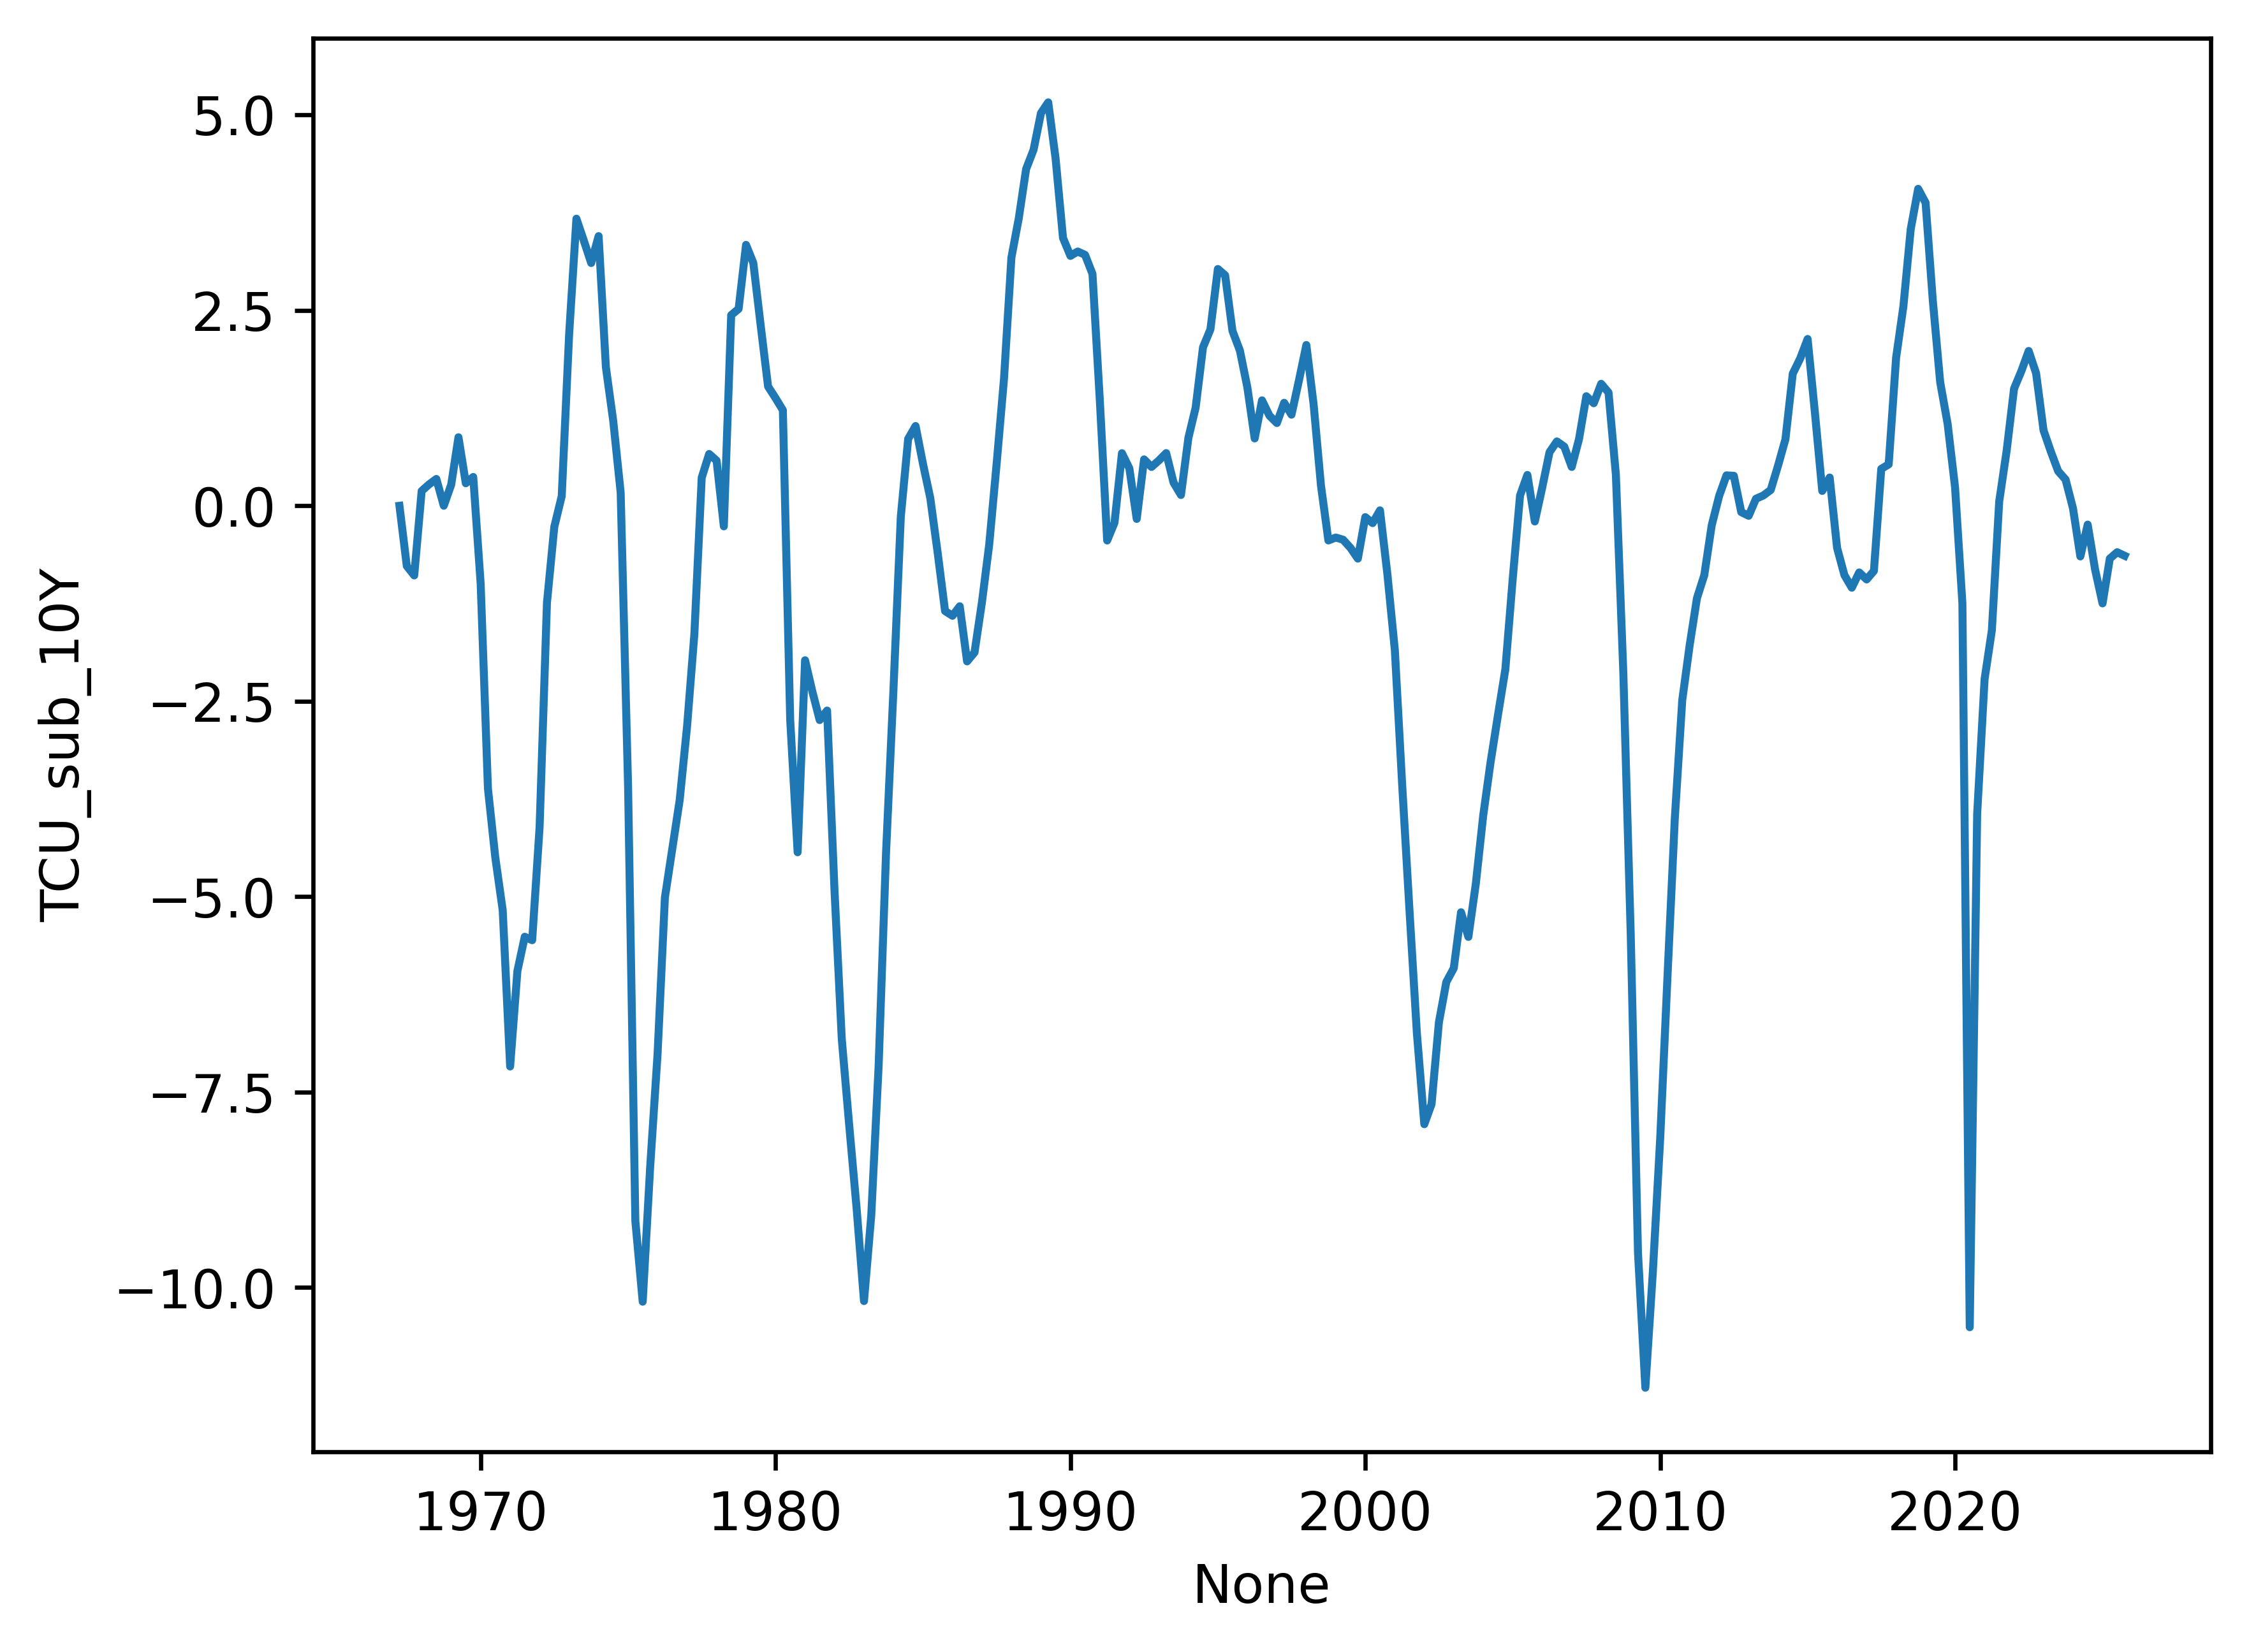

In [13]:
sns.lineplot(x=df.index, y=df['TCU_sub_10Y'])

<Axes: xlabel='period', ylabel='TCU'>

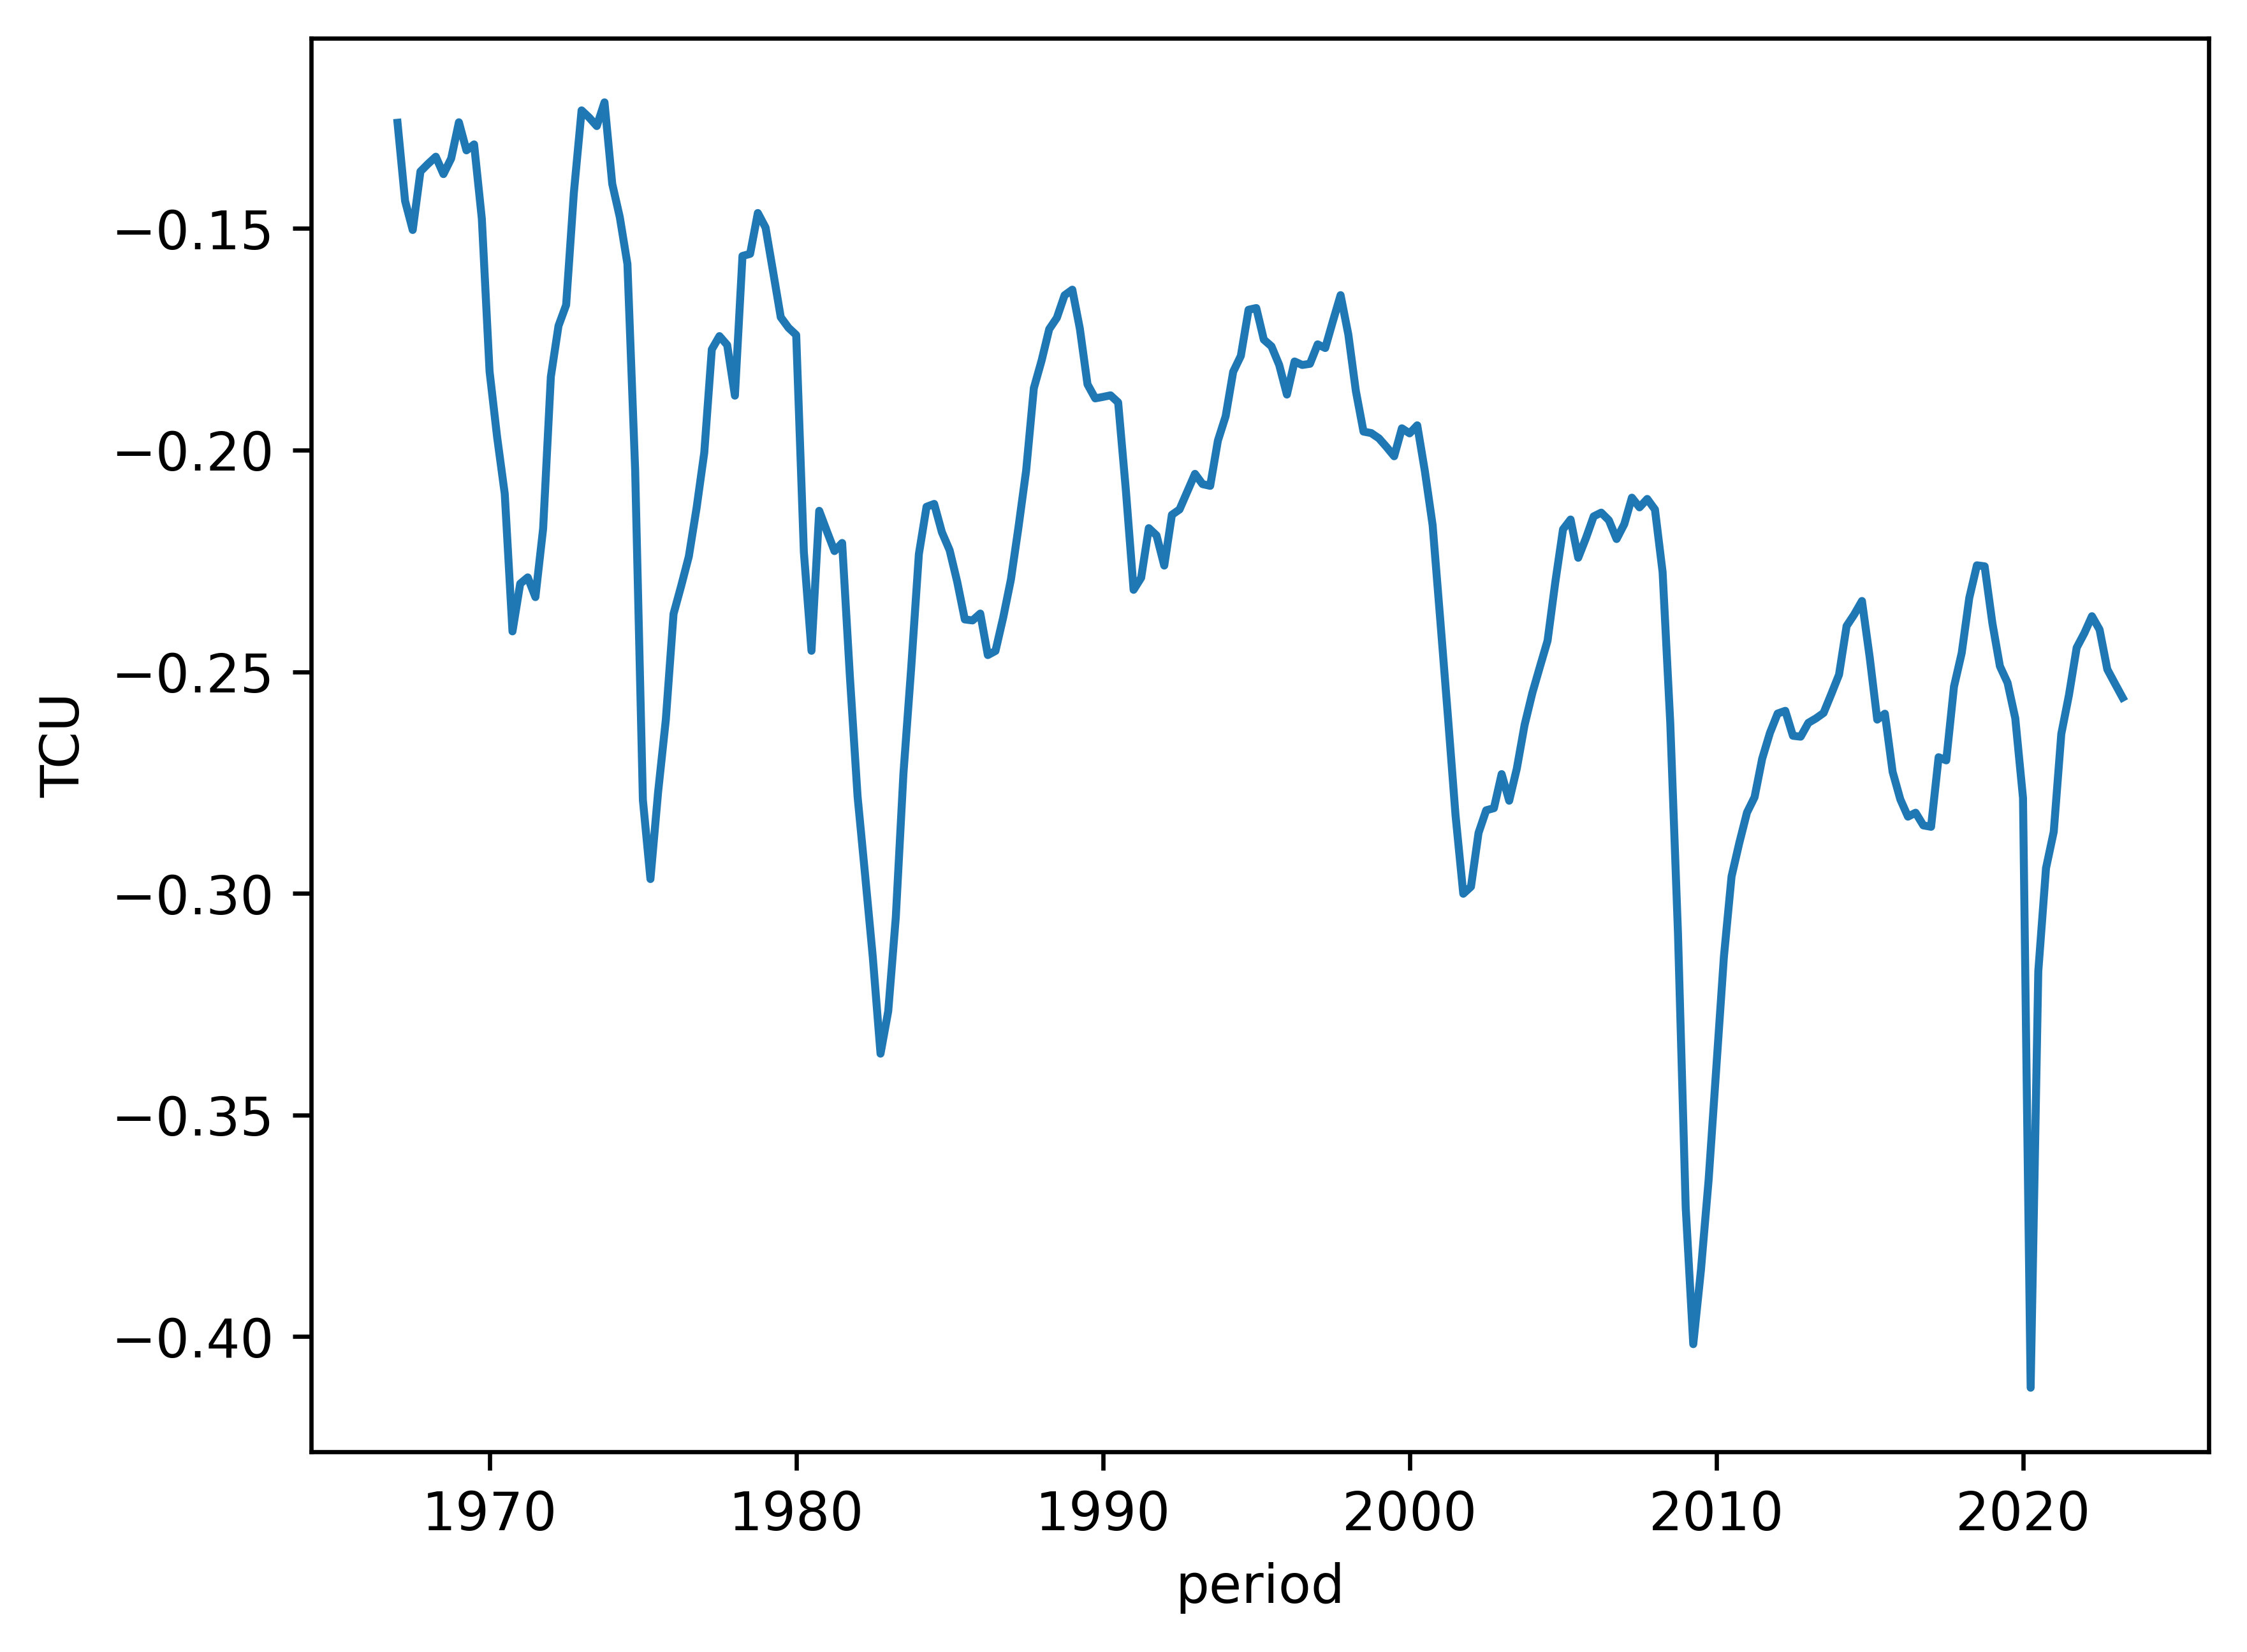

In [17]:
sns.lineplot(x=df_reg.period, y=np.log(df_reg.TCU/100))

<Axes: xlabel='period', ylabel='TCU'>

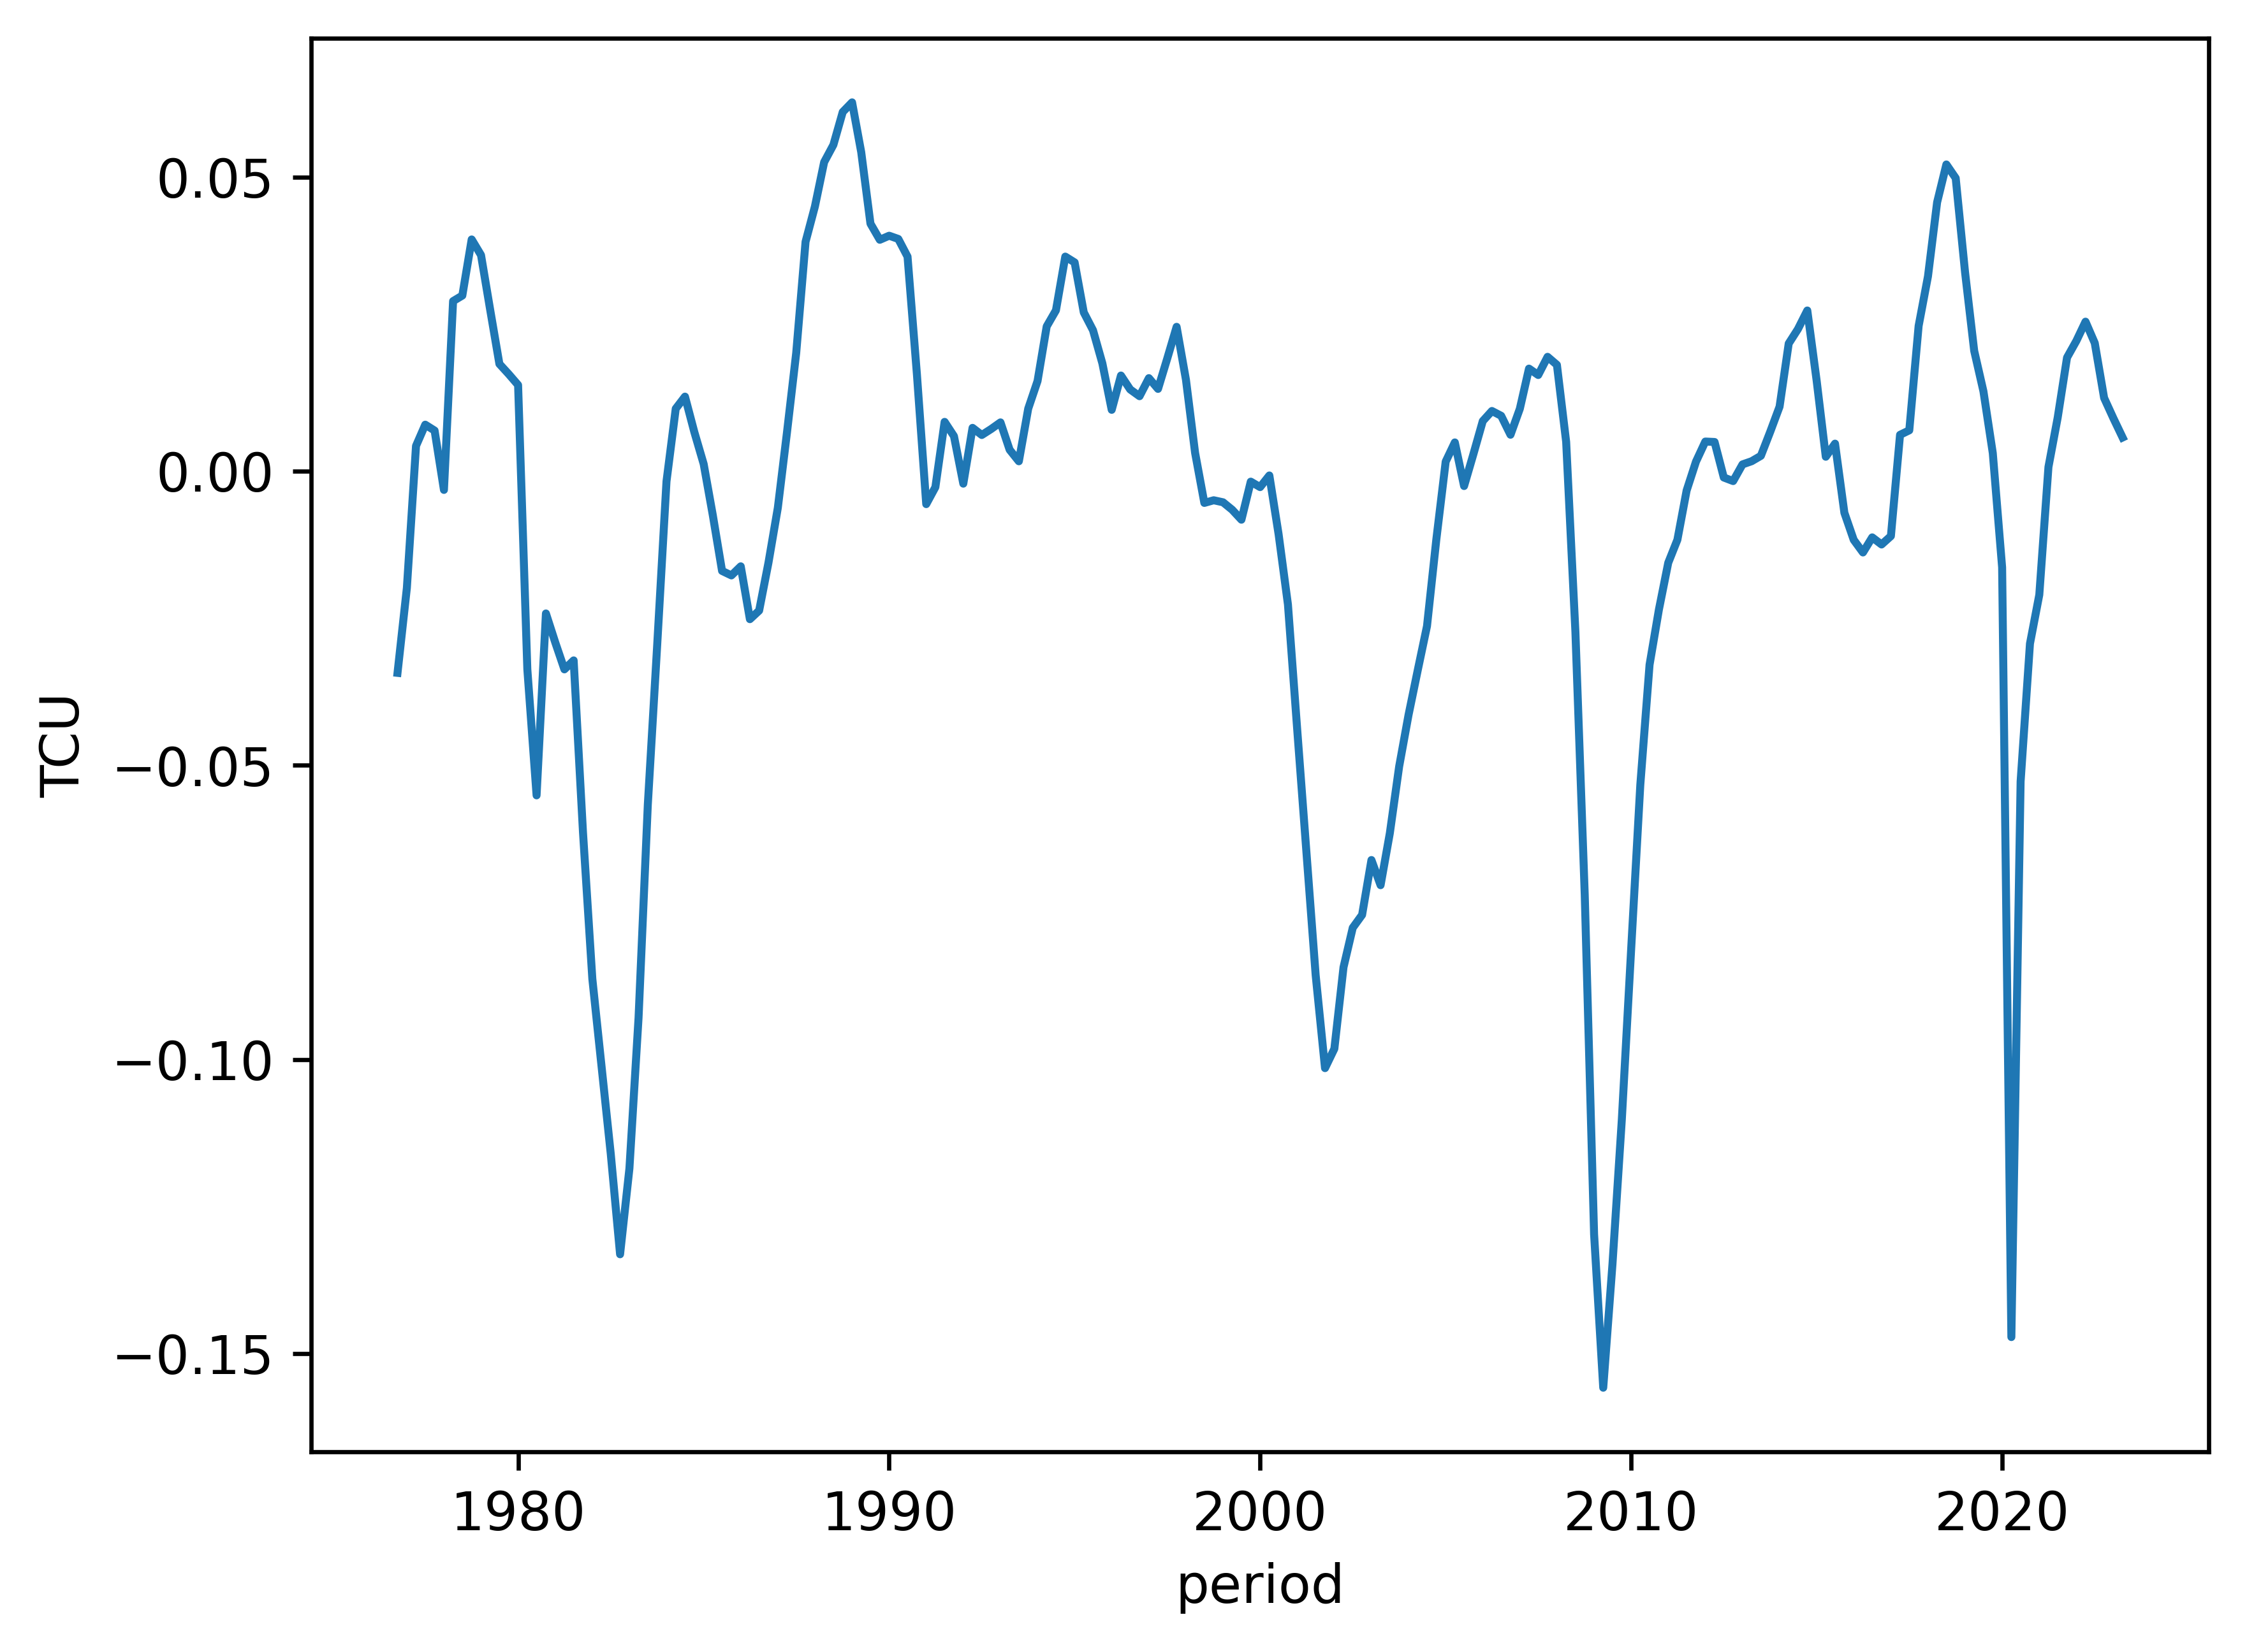

In [18]:
sns.lineplot(x=df_reg.period, y=np.log(df_reg.TCU) - np.log((df_reg.TCU).rolling(40).mean()))

<Axes: xlabel='period', ylabel='TCU'>

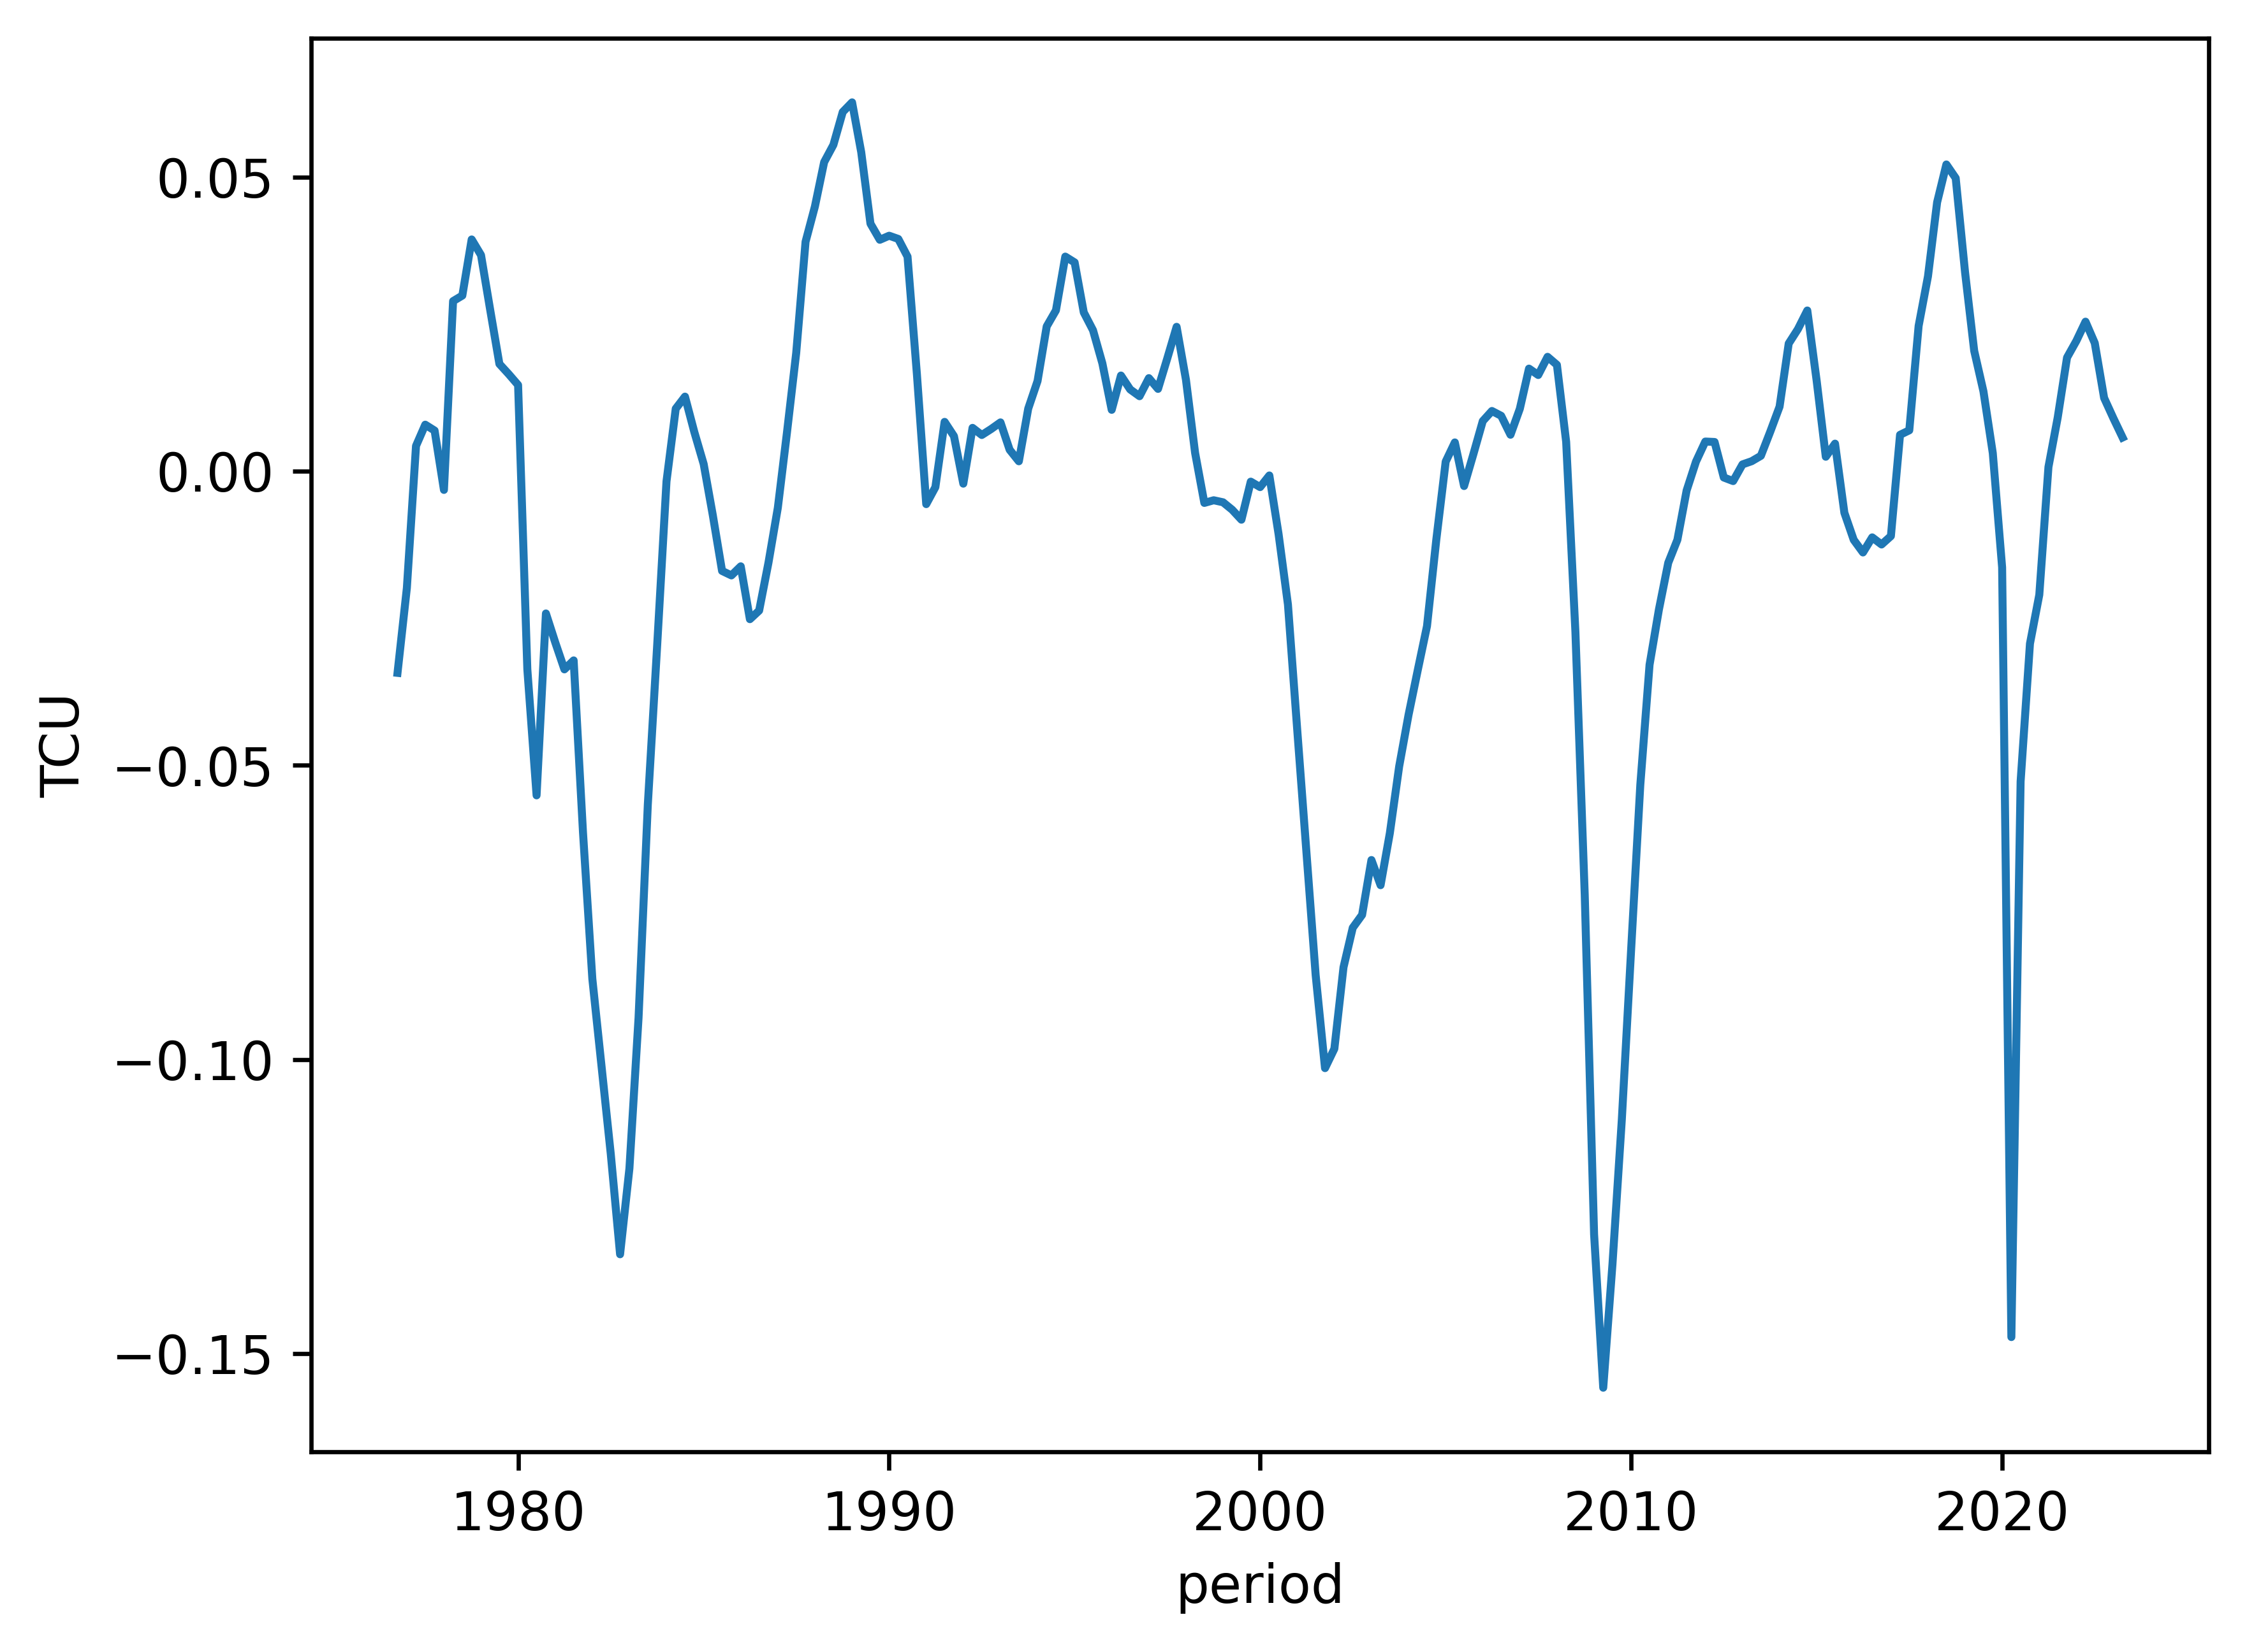

In [14]:
sns.lineplot(x=df_reg.period, y=np.log(df_reg.TCU/100) - np.log((df_reg.TCU/100).rolling(40).mean()))